![Iris](https://raw.githubusercontent.com/ritchieng/machine-learning-dataschool/master/images/03_iris.png)

### Load Data

In [1]:
from sklearn import datasets
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
iris = datasets.load_iris()

In [3]:
demo = pd.DataFrame(iris.data)
demo.columns = iris.feature_names

In [4]:
demo.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
demo['target'] = iris.target

In [6]:
demo.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


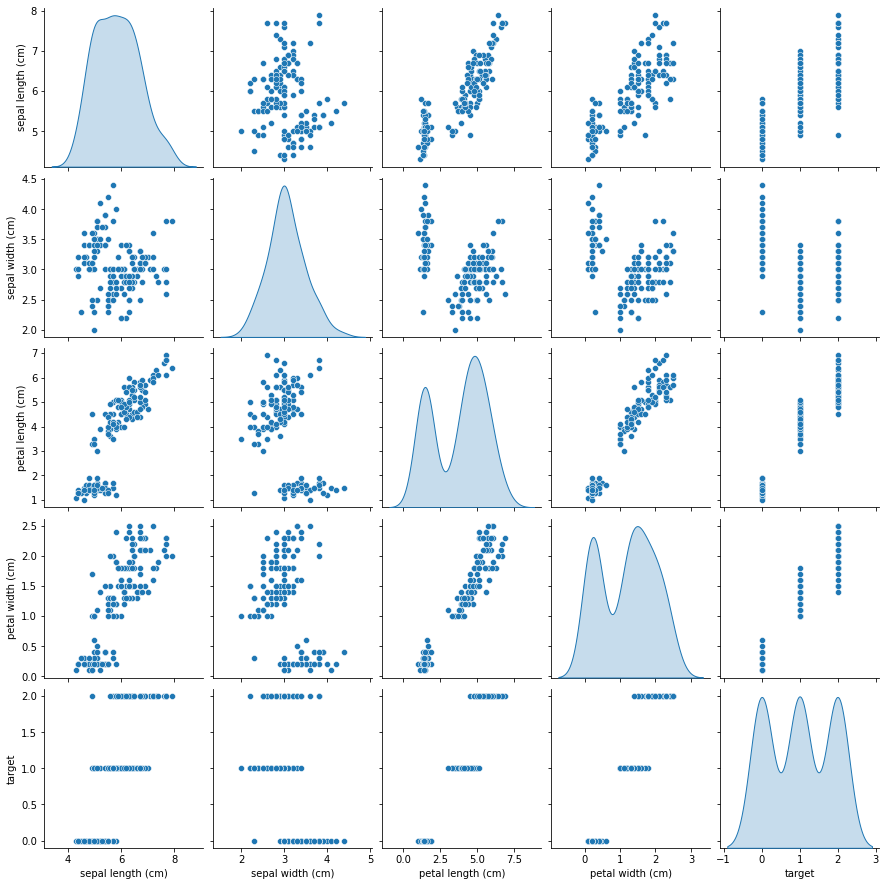

In [7]:
sns.pairplot(demo,diag_kind='kde')

<AxesSubplot:>

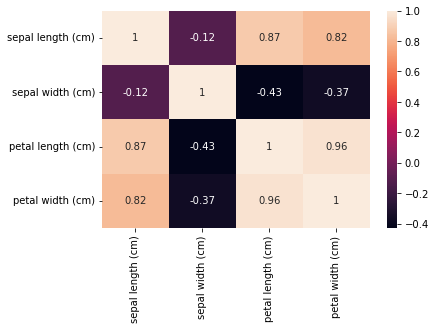

In [8]:
X = demo.drop('target',axis=1)
y = demo['target']
sns.heatmap(X.corr(),annot=True)

In [9]:
from sklearn.decomposition import PCA,KernelPCA
pca = PCA(n_components=4)
transformedX = pca.fit_transform(X)

In [10]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [11]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [13]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [14]:
X.shape

(150, 4)

In [15]:
transformedX.shape

(150, 4)

<AxesSubplot:>

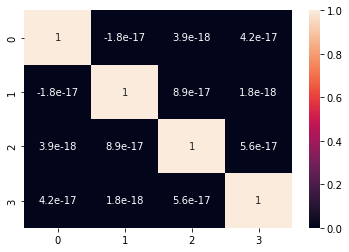

In [16]:
sns.heatmap(pd.DataFrame(transformedX).corr(),annot=True)

### Building a Classifier

In [17]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Split Train and Test Data

In [18]:
X = demo.drop('target',axis=1)
y = demo['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=30)

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Check Accuracy

In [21]:
model.score(X_test, y_test)

0.9111111111111111

### Using PCA

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledXtrain = sc.fit_transform(X_train)
scaledXtest = sc.transform(X_test)

PCA with 2 components

In [23]:
pca = PCA(n_components=1)
pcaXtrain = pca.fit_transform(scaledXtrain)
pcaXtest = pca.transform(scaledXtest)

### Building Classifier using PCA features

In [41]:
model2 = LogisticRegression()
model2.fit(pcaXtrain, y_train)
print(model2.score(pcaXtest, y_test))

0.9333333333333333
